In [27]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import matplotlib as mpl
import nsepy as nse
from nsepy import get_history
import mplfinance as mpf
import matplotlib.animation as animation

In [3]:
nifty=pd.read_csv('NIFTY500.csv')

In [4]:
#symbol=nifty[['SYMBOL']]
nifty.columns


Index(['Company Name', 'Industry', 'Symbol', 'Series', 'ISIN Code'], dtype='object')

In [5]:
nifty.shape

(501, 5)

In [6]:
nifty.info

<bound method DataFrame.info of                                   Company Name  \
0                                3M India Ltd.   
1                               ABB India Ltd.   
2    ABB Power Products and Systems India Ltd.   
3                                     ACC Ltd.   
4                         AIA Engineering Ltd.   
..                                         ...   
496                              Yes Bank Ltd.   
497         Zee Entertainment Enterprises Ltd.   
498                    Zensar Technolgies Ltd.   
499                        Zydus Wellness Ltd.   
500                       eClerx Services Ltd.   

                              Industry      Symbol Series     ISIN Code  
0                       CONSUMER GOODS     3MINDIA     EQ  INE470A01017  
1             INDUSTRIAL MANUFACTURING         ABB     EQ  INE117A01022  
2             INDUSTRIAL MANUFACTURING  POWERINDIA     EQ  INE07Y701011  
3             CEMENT & CEMENT PRODUCTS         ACC     EQ  INE012A01025

In [7]:
mc = mpf.make_marketcolors(up='g',down='r',edge='black',volume='gray',ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

In [8]:
 #rising_stock=get_history("TCS",start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
 #rising_stock.head()   

In [9]:
#rising_stock.reset_index('Date',inplace=True)
#rising_stock.columns


In [10]:
#rising_stock['Date'] = pd.to_datetime(rising_stock.Date)

In [23]:
d = datetime.today() - timedelta(days=180)
print(d.year)
print(d.month)

print(d.day)

2020
12
6


In [83]:
# delete a row
for index, row in nifty.iterrows():
    symbol=row["Symbol"]
    df=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    df.drop(df.tail(1).index,inplace=True)
    df.to_csv(f"stocks/{symbol}.csv")
    

# Add a row

In [ ]:

for index, row in nifty.iterrows():
    symbol="ACC" #row["Symbol"]
    d = datetime.today() - timedelta(days=1)
    day=datetime.now().day
    month=datetime.now().month
    year=datetime.now().year
    df1=get_history(symbol,start=datetime(d.year,d.month,d.day),end=datetime(year,month,day))
    df1=pd.DataFrame(df1)
    #print(df1)
    #df1
    df1.reset_index('Date',inplace=True)
    df1['Date'] = pd.to_datetime(df1.Date)
    df1.set_index('Date',inplace=True)
    df2=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    #df2.drop(df.head(2).index,inplace=True)
    df3 = pd.concat([df2, df1])
    df3.to_csv(f"stocks/{symbol}.csv")


# Get history of stocks and store 

In [56]:
for index, row in nifty.iterrows():
    symbol=row["Symbol"]
    d = datetime.today() - timedelta(days=150)
    day=datetime.now().day
    month=datetime.now().month
    year=datetime.now().year
    df=get_history(symbol,start=datetime(d.year,d.month,d.day),end=datetime(year,month,day))
    data=pd.DataFrame(df)
    data.to_csv(f"stocks/{symbol}.csv")
    #print(data.shape)

# Get historical data of all Nifty50 stocks and filter out rising stocks
# Calculating the simple moving average (which is just mean calculated progressively) and add the result as a new column to dataframe

CHOLAFIN


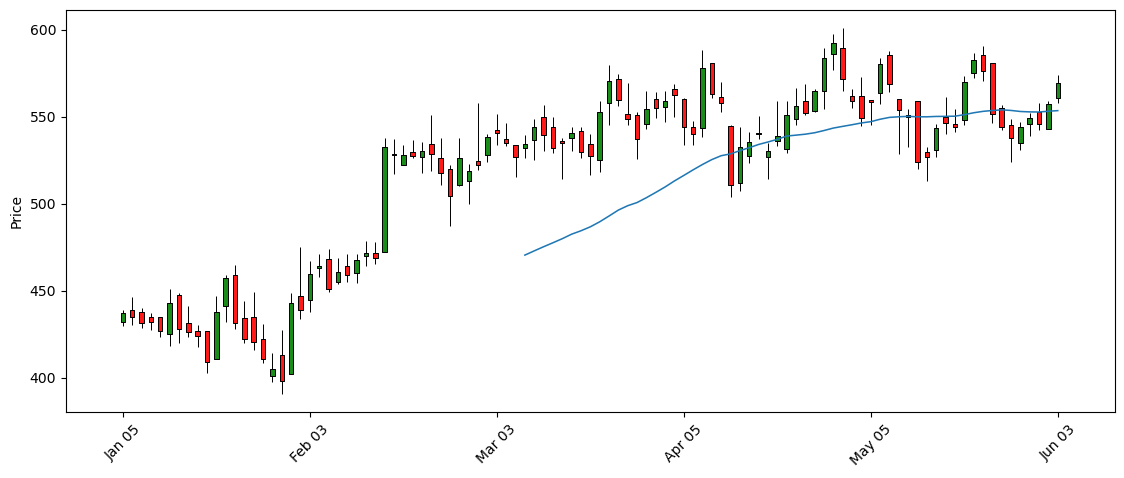

ELGIEQUIP


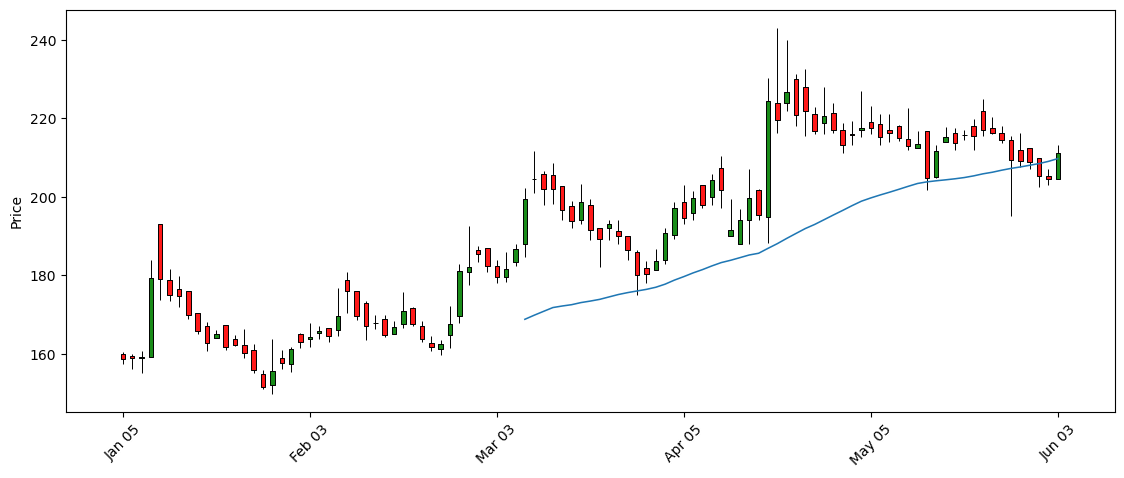

HEG


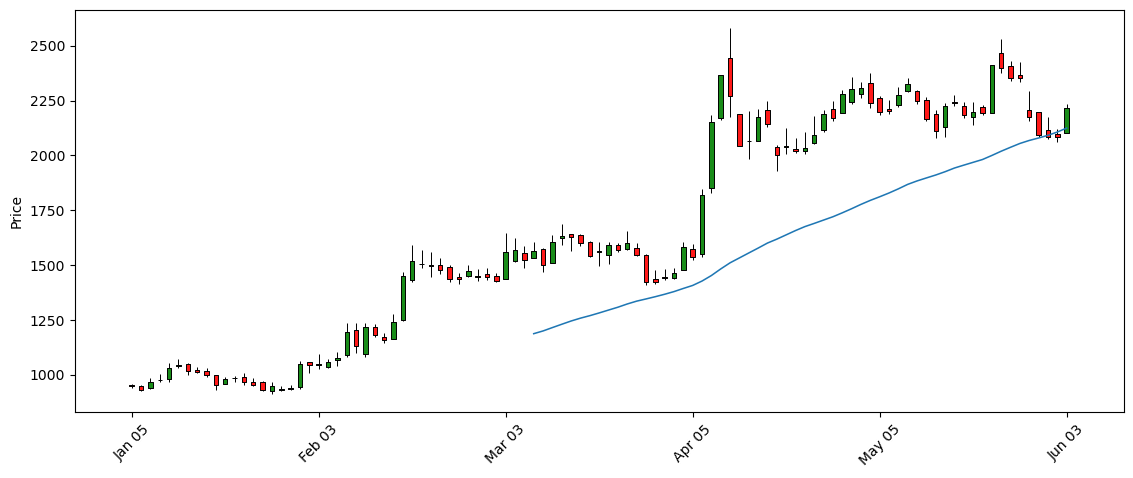

PRSMJOHNSN


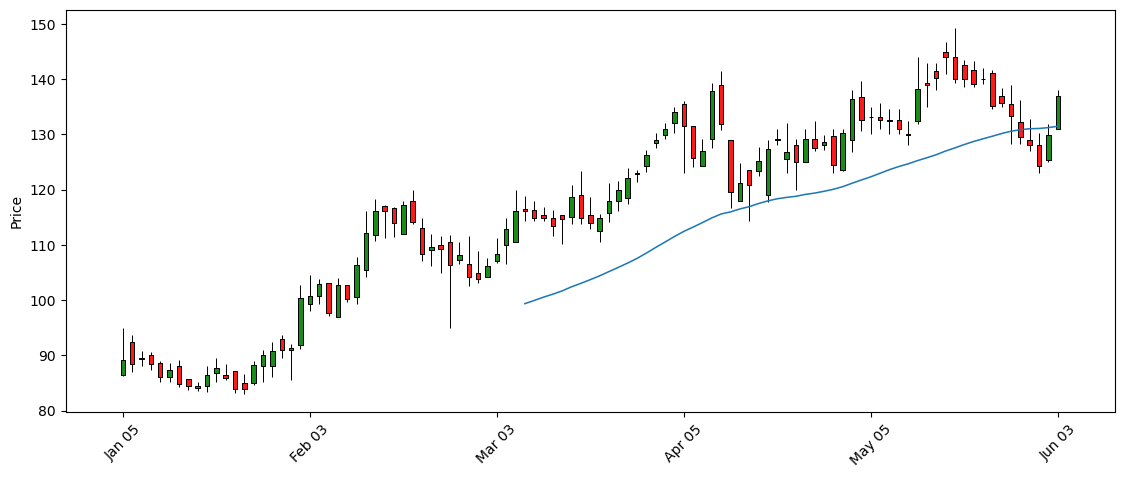

THERMAX


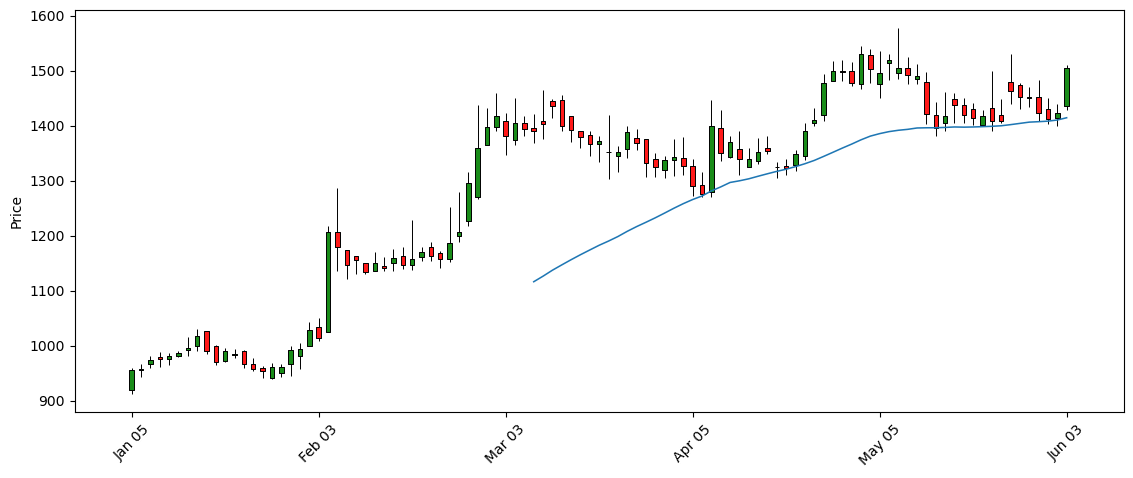

ZYDUSWELL


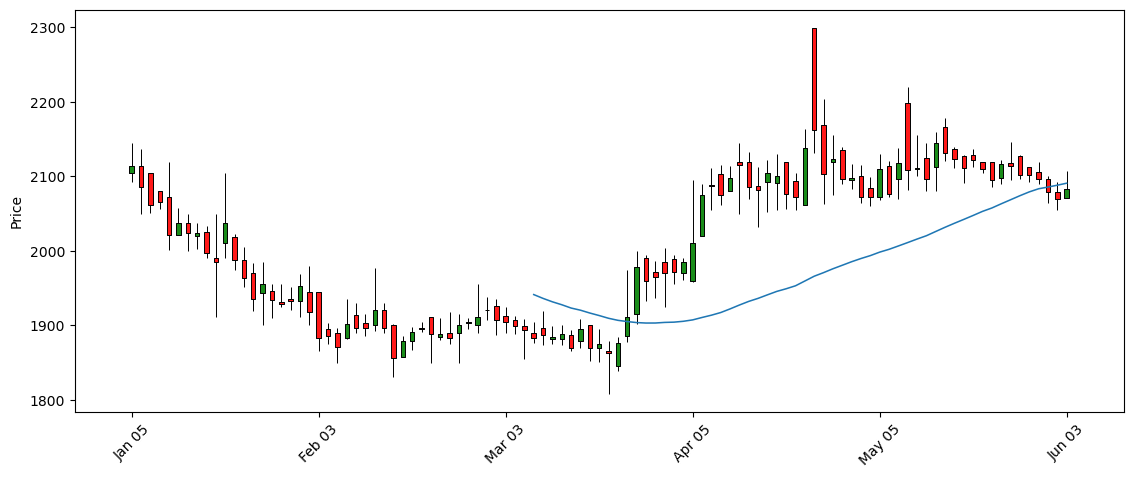

In [82]:
list=[]
for index, row in nifty.iterrows():
    symbol=row["Symbol"]
    #rising_stock=get_history(symbol,start=datetime(2021,1,1),end=datetime(datetime.now().year,datetime.now().month,datetime.now().day))
    rising_stock=pd.read_csv(f'stocks/{symbol}.csv',index_col=0,parse_dates=True)
    if rising_stock.shape[0]> 1:
        open=rising_stock['Open'][-1]
        close=rising_stock['Close'][-1]
        if open< close :
            SMA_window = 44
            rising_stock["44_obs_for_SMA"] = rising_stock["Close"].rolling(window=SMA_window).mean()

            sma_last=rising_stock["44_obs_for_SMA"][-1]
            sma_5=rising_stock["44_obs_for_SMA"][-5]
            sma_11=rising_stock["44_obs_for_SMA"][-11]
            sma_16=rising_stock["44_obs_for_SMA"][-16]
            sma_22=rising_stock["44_obs_for_SMA"][-22]
            sma_33=rising_stock["44_obs_for_SMA"][-33]
            sma_44=rising_stock["44_obs_for_SMA"][-44]
            high=rising_stock["High"][-1]
            low=rising_stock["Low"][-1]
            price=close*(1/100)
            if sma_44<sma_33 and sma_33<sma_22 and sma_22<sma_16 and sma_16<sma_11 and sma_11<sma_5 and sma_5<sma_last:
                if (high>= sma_last and low<= sma_last) or (abs(low-sma_last)<=price and low>=sma_last):
                    sublist=[]
                    sublist.append(symbol)
                    list.append(sublist)
                    #rising_stock.reset_index('Date',inplace=True)
                    #rising_stock['Date'] = pd.to_datetime(rising_stock.Date)
                    #rising_stock.set_index('Date',inplace=True)
                    print(symbol)

                    mpf.plot(rising_stock,type='candle',figratio=(38,15),mav=44,style=s)
                

In [63]:
data=pd.DataFrame(list,columns=["Symbol"])
data.to_csv("stocks/rising_stocks.csv")

In [8]:
data=pd.DataFrame(list,columns=["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"])
data=data[["SYMBOL","Open","High","Low","Close","44_obs_for_SMA"]]
data.to_csv("stocks/rising_stocks.csv")

In [64]:
rising_stocks=pd.read_csv('stocks/rising_stocks.csv',index_col=0)

In [10]:
rising_stocks.columns

Index(['SYMBOL', 'Open', 'High', 'Low', 'Close', '44_obs_for_SMA'], dtype='object')

In [65]:
rising_stocks

,Symbol
0,APLAPOLLO
1,CHOLAFIN
2,DABUR
3,INFY
4,PRSMJOHNSN
5,THERMAX
6,ZYDUSWELL


In [12]:
### and plot the graph with points where upturn happen

for index, row in rising_stocks.iterrows():
    if row["High"]>= row["44_obs_for_SMA"] and row["44_obs_for_SMA"] >=row["Low"] :
        #print(row["SYMBOL"])
        print("{symbol}    {high}       {low}         {sma} ".format(symbol=row["SYMBOL"],high=round(row["High"]),low=round(row["Low"]),sma=round(row["44_obs_for_SMA"])))

GODREJIND    538       520         529 


In [13]:
#rising_stock.dtypes

In [14]:
mc = mpf.make_marketcolors(up='g',down='r',
                           edge='black',
                           
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(marketcolors=mc)

EMAMILTD
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '44_obs_for_SMA'],
      dtype='object')


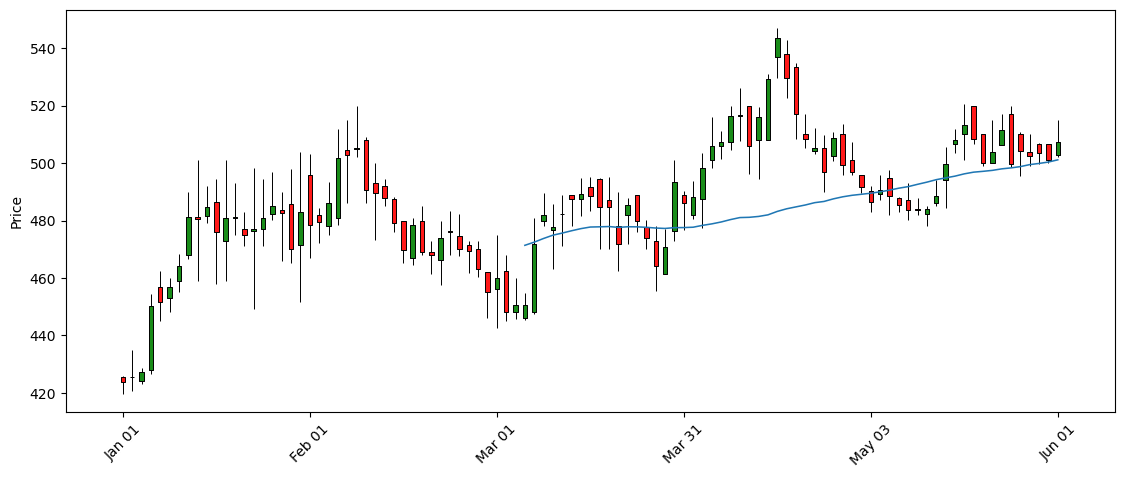

GODREJIND
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', '44_obs_for_SMA'],
      dtype='object')


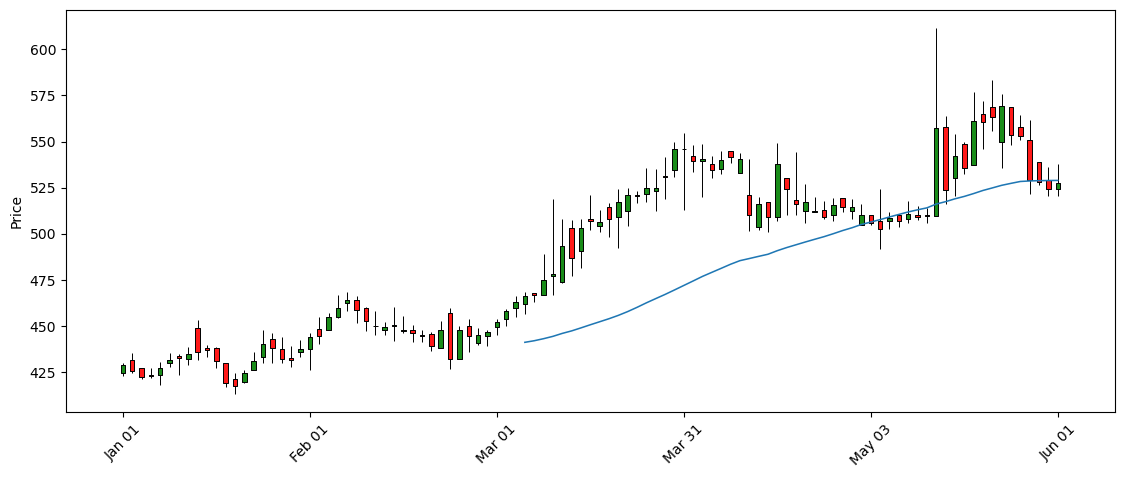

In [63]:
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    #if (stock["High"][-1]>= stock["44_obs_for_SMA"][-1]) and (stock["Low"][-1]<= stock["44_obs_for_SMA"][-1]):
    print(row["SYMBOL"])
    print(stock.columns)

    mpf.plot(stock,type='candle',figratio=(38,15),mav=44,style=s)

In [18]:
import pathlib
import IPython.display as IPydisplay
#stock = pd.read_csv('stocks/TCS.csv',index_col=0,parse_dates=True)
for index, row in rising_stocks.iterrows():
    stock = pd.read_csv('stocks/{symbol}.csv'.format(symbol=row["SYMBOL"]),index_col=0,parse_dates=True)
    ourpath = pathlib.Path("img/{symbol}.png".format(symbol=row["SYMBOL"]))
    mpf.plot(stock, type='candle',figratio=(100,40), mav=44, savefig=ourpath,style=s)
    #IPydisplay.Image(ourpath)

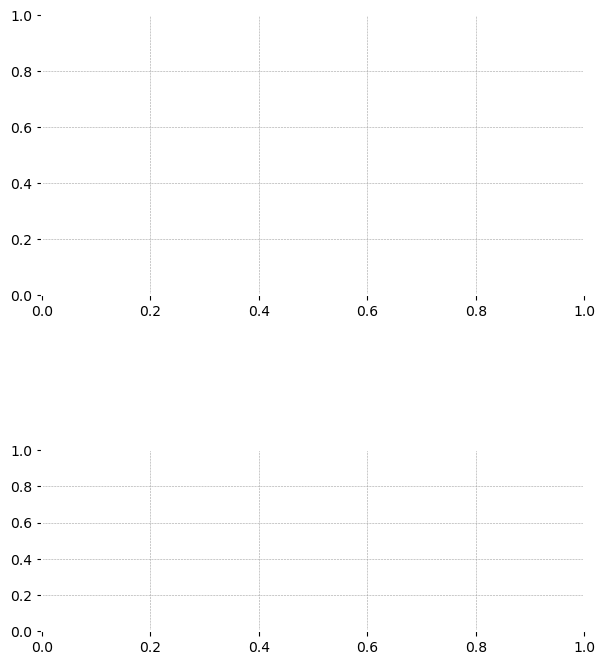

In [29]:
idf = pd.read_csv('stocks/TCS.csv',index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)
df = idf.loc['2011-07-01':'2011-12-30',:]

fig = mpf.figure(style='charles',figsize=(7,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(3,1,3)

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(20+ival)]
    ax1.clear()
    ax2.clear()
    mpf.plot(data,ax=ax1,volume=ax2,type='candle')

ani = animation.FuncAnimation(fig, animate, interval=250)

mpf.show()